<a href="https://colab.research.google.com/github/Flaviaestat/Phyton/blob/master/00_Principais_Phyton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### RESUMÃO PHYTON

Operadores Condicionais


In [0]:
x = 300

if x == 300:
  status = 'Na mosca!'
elif x>= 300:
  status = 'Maior!'
else:
  status = 'Menor :('

print('O valor é ' + status)



O valor é Na mosca!


Estrutura de loop básica


In [0]:
numeros = []
multiplo = 3

for i in range(0,10):
  resto = i%multiplo
  numeros.append( i * resto)


print('Mostra apenas os multiplos de ' + str(multiplo) + ' :')
print(numeros)
print('O último elemento é')
print(numeros[-1])
print('O primeiro elemento é')
print(numeros[0])
print('O segundo é')
print(numeros[1])




Mostra apenas os multiplos de 3 :
[0, 1, 4, 0, 4, 10, 0, 7, 16, 0]
O último elemento é
0
O primeiro elemento é
0
O segundo é
1


Input box

In [0]:
  age = input('Qual a sua idade?')


Qual a sua idade?20


Função

In [0]:
def idade(n):

  x = n * 2
  y = n / 2
  print('o dobro da sua idade é :' + str(x))
  print('a metade da sua idade é :' + str(y))



In [0]:
idade(20)

o dobro da sua idade é :40
a metade da sua idade é :10.0


In [0]:
def fizzBuzz(n):
    # Write your code here

    for i in range (1,n+1):

        if i%3 == 0 and i%5 == 0:
            print('FizzBuzz')
        elif i%3 == 0:
            print('Fizz')
        elif i%5 == 0:
            print('Buzz')
        else:
            print(i)

fizzBuzz(15)

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz


Manipulação com arrays

In [1]:
dates = ['2018-01-01','2017-02-01', '2019-10-01']
evento = ['A','B','C']
valores = [200,300,400]
categoria = ['XL', 'XL','XS']

months = dates[5:1] #não consegui extrair uma posição no string do array - mais fácil no pandas
print(months)


[]


In [2]:
estados = ['GO', 'GO', 'SP', 'RJ']

estados_distintos = set(estados)

print(estados_distintos)

for index,element in enumerate(estados_distintos):
    lista = index,element

print(lista)


{'SP', 'GO', 'RJ'}
(2, 'RJ')


**Carregamento da base e visualização**

In [0]:
import numpy as np
import pandas as pd

#tranforma o arrays em colunas no mesmo dataframe

datesDf = pd.DataFrame({'Data': dates, 'Evento': evento, 'Valores': valores, 'Categoria': categoria})


Criando colunas de datas

In [4]:
datesDf['Date'] = pd.to_datetime(datesDf['Data']) #padrão dateTime
datesDf['ano'] = datesDf['Date'].map(lambda x: x.strftime('%Y'))
#datesDf['Dia'] = datesDf['Date'].map(lambda x: x.strftime('%D'))

datesDf.head()

,Data,Evento,Valores,Categoria,Date,ano
0,2018-01-01,A,200,XL,2018-01-01,2018
1,2017-02-01,B,300,XL,2017-02-01,2017
2,2019-10-01,C,400,XS,2019-10-01,2019


In [0]:
#carrega base em csv

path = ''

baseDfCsv = pd.read_csv(path)

**Descrever features**

In [5]:
datesDf.describe()

,Valores
count,3.0
mean,300.0
std,100.0
min,200.0
25%,250.0
50%,300.0
75%,350.0
max,400.0


Criando um contador (índice)

In [6]:
datesDf['Indice'] = list(range(len(datesDf.index)))
datesDf['Indice'] = datesDf['Indice'] + 1

datesDf.head(5)

,Data,Evento,Valores,Categoria,Date,ano,Indice
0,2018-01-01,A,200,XL,2018-01-01,2018,1
1,2017-02-01,B,300,XL,2017-02-01,2017,2
2,2019-10-01,C,400,XS,2019-10-01,2019,3


Contar distintos em um dataframe

In [8]:
print(len(datesDf['Categoria'].unique()))

2


Contagem por var categorica

In [9]:
baseCount = datesDf.groupby("Categoria")["Categoria"].count() #tb funciona para sum

baseCount.head(5)


Categoria
XL    2
XS    1
Name: Categoria, dtype: int64

In [10]:
baseSum = datesDf.groupby("Categoria")["Valores"].sum()

baseSum.head(5)

Categoria
XL    500
XS    400
Name: Valores, dtype: int64

Agregação Outras funções

Agregação (médias, min, max) das variáveis numéricas por grupo

In [0]:
baseAgg = datesDf.groupby('Evento').agg({'Valores':['min','max','mean', 'first','last'], 'Categoria':['first']})

baseAgg.head(5)

Valores                      Categoria
           min  max mean first last     first
Evento                                       
A          200  200  200   200  200        XL
B          300  300  300   300  300        XL
C          400  400  400   400  400        XS

Seleciona Colunas

In [0]:
# select only required columns
baseReduzida = datesDf[["Valores", "Evento"]]

baseReduzida.head()

,Valores,Evento
0,200,A
1,300,B
2,400,C


Cria nova coluna

In [12]:
datesDf['Valores10Perc'] = datesDf['Valores'] * 1.1 #metodo mais simples - aplicando crescimento de 10%
datesDf['Valores20Perc'] = datesDf['Valores'].apply(lambda x: x * 1.2) #com apply - aplicando crescimento de 20%

#função que multiplica por 2 para ser aplicado na coluna
def doubleData(x):
   return x * 2

datesDf['ValoresDobro'] = datesDf['Valores'].apply(doubleData) #com apply e função doubleData

#função para criar faixa de valores
def Status(x):
  if x >= 300:
    return 'faixa1'
  else:
    return 'faixa0'

datesDf['Status'] = datesDf['Valores'].apply(Status) #com apply e função de classificação

datesDf.head(5)

,Data,Evento,Valores,Categoria,Date,ano,Indice,Valores10Perc,Valores20Perc,ValoresDobro,Status
0,2018-01-01,A,200,XL,2018-01-01,2018,1,220.0,240.0,400,faixa0
1,2017-02-01,B,300,XL,2017-02-01,2017,2,330.0,360.0,600,faixa1
2,2019-10-01,C,400,XS,2019-10-01,2019,3,440.0,480.0,800,faixa1


Tratamento NULLS

In [13]:
datesDf['exemploNull'] = np.nan # criando coluna de nulls para exemplo

datesDf.head(5)

,Data,Evento,Valores,Categoria,Date,ano,Indice,Valores10Perc,Valores20Perc,ValoresDobro,Status,exemploNull
0,2018-01-01,A,200,XL,2018-01-01,2018,1,220.0,240.0,400,faixa0,NaN
1,2017-02-01,B,300,XL,2017-02-01,2017,2,330.0,360.0,600,faixa1,NaN
2,2019-10-01,C,400,XS,2019-10-01,2019,3,440.0,480.0,800,faixa1,NaN


Operating on Null Values
As we have seen, Pandas treats None and NaN as essentially interchangeable for indicating missing or null values. To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures. They are:

isnull(): Generate a boolean mask indicating missing values
notnull(): Opposite of isnull()
dropna(): Return a filtered version of the data
 fillna(): Return a copy of the data with missing values filled or imputed

In [14]:
datesDf['exemploNull'] = datesDf['exemploNull'].fillna(0.0) #recodificando para 0

datesDf.head(5)

,Data,Evento,Valores,Categoria,Date,ano,Indice,Valores10Perc,Valores20Perc,ValoresDobro,Status,exemploNull
0,2018-01-01,A,200,XL,2018-01-01,2018,1,220.0,240.0,400,faixa0,0.0
1,2017-02-01,B,300,XL,2017-02-01,2017,2,330.0,360.0,600,faixa1,0.0
2,2019-10-01,C,400,XS,2019-10-01,2019,3,440.0,480.0,800,faixa1,0.0


Filtrar

In [0]:

 #primeira forma
datesFilter = datesDf[datesDf['Status'] == 'faixa1']



Filtrar por lista

In [16]:
faixas = ['faixa1'] #permite mais de um valor

datesFilter = datesDf[datesDf.Status.isin(faixas)]

datesFilter.head(5)

,Data,Evento,Valores,Categoria,Date,ano,Indice,Valores10Perc,Valores20Perc,ValoresDobro,Status,exemploNull
1,2017-02-01,B,300,XL,2017-02-01,2017,2,330.0,360.0,600,faixa1,0.0
2,2019-10-01,C,400,XS,2019-10-01,2019,3,440.0,480.0,800,faixa1,0.0


Filtrar com não contém

In [17]:
faixas = ['faixa1']#permite mais de um valor

datesFilter = datesDf[~datesDf.Status.isin(faixas)] # naõ contém 

datesFilter.head(5)

,Data,Evento,Valores,Categoria,Date,ano,Indice,Valores10Perc,Valores20Perc,ValoresDobro,Status,exemploNull
0,2018-01-01,A,200,XL,2018-01-01,2018,1,220.0,240.0,400,faixa0,0.0


Join

In [0]:
# Trazendo a descrição dos eventos A, B e C para o dataFrame "datesDf"
# Mas antes, vou criar um dataframe de testes "DescriEventosDf" com a descrição dos eventos A e B (não incluirei C para testar)  

ChaveEventos = ['A','B']
DescriEventos = ['Transacao concluida', 'Transacao negada']
DescriEventosDf = pd.DataFrame({'Evento': ChaveEventos, 'Desc_Evento': DescriEventos})


In [24]:
datesDfAdd = datesDf.join(DescriEventosDf.set_index('Evento'), on = 'Evento', how = 'left' )

#pode usar lsuffix e rsuffix quando o nome das chaves é diferente. Ex: lsuffix='_caller', rsuffix='_other' (nesse caso não precisa inserir on e how)

datesDfAdd.head(5)

,Data,Evento,Valores,Categoria,Date,ano,Indice,Valores10Perc,Valores20Perc,ValoresDobro,Status,exemploNull,Desc_Evento
0,2018-01-01,A,200,XL,2018-01-01,2018,1,220.0,240.0,400,faixa0,0.0,Transacao concluida
1,2017-02-01,B,300,XL,2017-02-01,2017,2,330.0,360.0,600,faixa1,0.0,Transacao negada
2,2019-10-01,C,400,XS,2019-10-01,2019,3,440.0,480.0,800,faixa1,0.0,NaN


In [25]:
datesDfAdd2 = datesDf.join(DescriEventosDf.set_index('Evento'), on = 'Evento', how = 'right' )

datesDfAdd2.head(5)

,Data,Evento,Valores,Categoria,Date,ano,Indice,Valores10Perc,Valores20Perc,ValoresDobro,Status,exemploNull,Desc_Evento
0,2018-01-01,A,200,XL,2018-01-01,2018,1,220.0,240.0,400,faixa0,0.0,Transacao concluida
1,2017-02-01,B,300,XL,2017-02-01,2017,2,330.0,360.0,600,faixa1,0.0,Transacao negada


Histograma

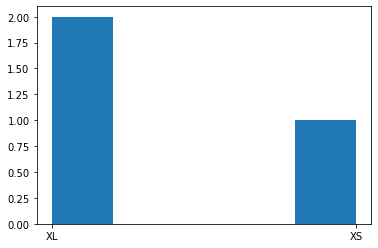

In [33]:
import matplotlib.pyplot as plt


plt.hist(datesDf['Categoria'], bins = 5)

plt.show()

Scatterplot

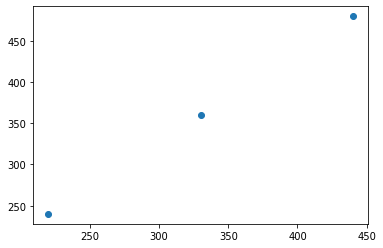

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(datesDf['Valores10Perc'],datesDf['Valores20Perc'])